### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the data

In [ ]:
data = pd.read_csv("/content/drive/My Drive/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Analyzing the data

In [ ]:
data.shape

(5109, 12)

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [ ]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Let's do some data visualization

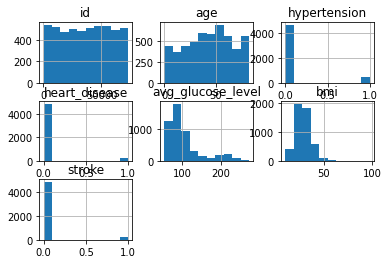

In [ ]:
import matplotlib.pyplot as plt 
data.hist()
plt.show()

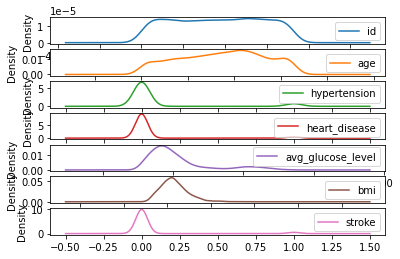

In [ ]:
data.plot(kind = 'density', subplots = True, sharex = False)
plt.show()

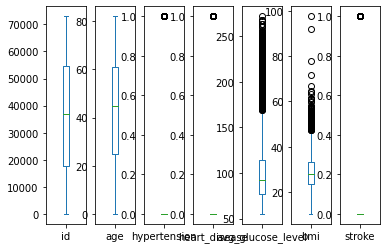

In [ ]:
data.plot(kind = 'box', subplots = True, sharex = False, sharey = False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2195238ed0>,
      dtype=object)

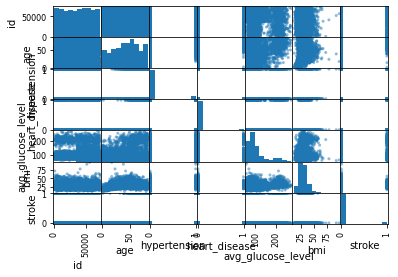

In [ ]:
pd.plotting.scatter_matrix(data)

### Converting categorical data into numerical data

In [ ]:
data2 = data.copy()
data2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data2 = data2.apply(LabelEncoder().fit_transform)
data2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3849,239,1,1
1,3610,0,82,0,0,1,3,0,3587,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4225,0,70,0,0,1,2,1,3384,217,3,1
4,114,0,100,1,0,1,3,0,3393,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1312,0,101,1,0,1,2,1,1360,418,2,0
5105,3100,0,102,0,0,1,3,1,3030,273,2,0
5106,1396,0,56,0,0,1,3,0,1314,179,2,0
5107,2601,1,72,0,0,1,2,0,3362,129,1,0


### Dealing with missing and null values

In [ ]:
data2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Split the data into train and test sets

In [ ]:
y = data2.stroke 
x = data2.drop('stroke', axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2106,4567,0,48,0,0,1,2,1,2174,134,1
2716,3204,1,36,0,0,0,2,1,990,121,0
3884,4950,0,49,0,1,1,2,0,2679,64,3
1486,99,1,22,0,0,0,4,1,2691,36,0
128,2573,1,103,0,0,1,0,1,3569,163,1


In [ ]:
x_train.shape

(4087, 11)

In [ ]:
x_test.shape

(1022, 11)

### Applying algorithms

In [ ]:
from sklearn import tree 
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.913894324853229

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9540117416829745

In [ ]:
from sklearn import svm 
clf1 = svm.SVC()
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

0.9540117416829745

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
clf2 = AdaBoostClassifier(n_estimators = 100, random_state = 0)
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

0.9549902152641878

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
clf3 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
clf3.fit(x_train, y_train) 
clf3.score(x_test, y_test)

0.9530332681017613

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf4 = LinearDiscriminantAnalysis()
clf4.fit(x_train, y_train)
clf4.score(x_test, y_test)

0.952054794520548

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf5 = QuadraticDiscriminantAnalysis()
clf5.fit(x_train, y_train)
clf5.score(x_test, y_test)

0.8786692759295499

### Confusion matrix for all algorithms

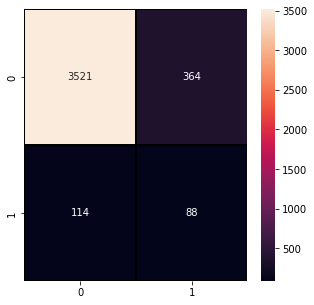

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3885
           1       0.19      0.44      0.27       202

    accuracy                           0.88      4087
   macro avg       0.58      0.67      0.60      4087
weighted avg       0.93      0.88      0.90      4087



In [ ]:

y_pred = clf5.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

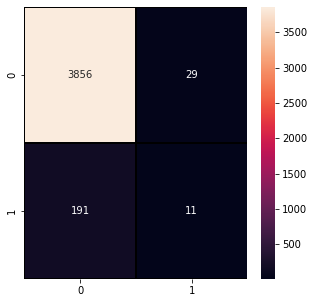

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3885
           1       0.28      0.05      0.09       202

    accuracy                           0.95      4087
   macro avg       0.61      0.52      0.53      4087
weighted avg       0.92      0.95      0.93      4087



In [ ]:

y_pred = clf4.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

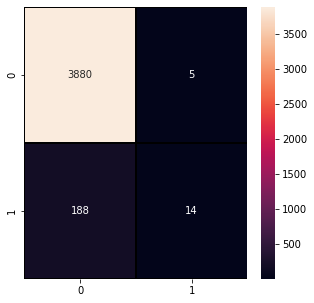

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3885
           1       0.74      0.07      0.13       202

    accuracy                           0.95      4087
   macro avg       0.85      0.53      0.55      4087
weighted avg       0.94      0.95      0.93      4087



In [ ]:

y_pred = clf3.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

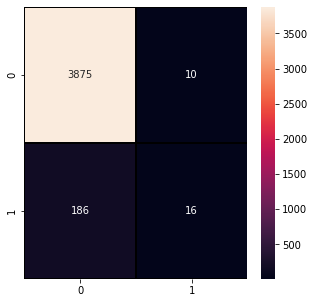

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3885
           1       0.62      0.08      0.14       202

    accuracy                           0.95      4087
   macro avg       0.78      0.54      0.56      4087
weighted avg       0.94      0.95      0.93      4087



In [ ]:

y_pred = clf2.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

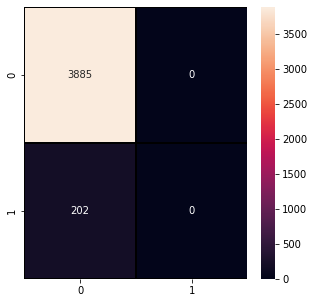

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3885
           1       0.00      0.00      0.00       202

    accuracy                           0.95      4087
   macro avg       0.48      0.50      0.49      4087
weighted avg       0.90      0.95      0.93      4087



In [ ]:

y_pred = clf1.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

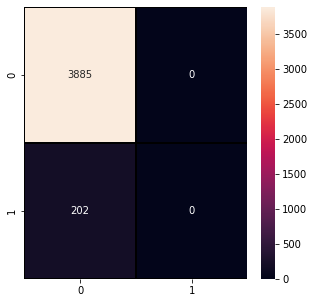

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3885
           1       0.00      0.00      0.00       202

    accuracy                           0.95      4087
   macro avg       0.48      0.50      0.49      4087
weighted avg       0.90      0.95      0.93      4087



In [ ]:

y_pred = clf.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

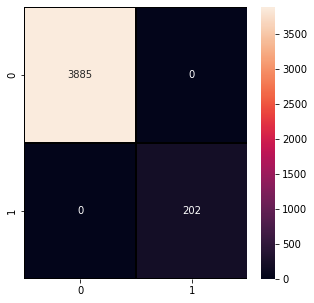

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3885
           1       1.00      1.00      1.00       202

    accuracy                           1.00      4087
   macro avg       1.00      1.00      1.00      4087
weighted avg       1.00      1.00      1.00      4087



In [ ]:

y_pred = model1.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))